In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import os, os.path
import glob
import numpy
from scipy import ndimage
from galpy.util import bovy_conversion, bovy_plot
import gd1_util
from gd1_util import R0, V0
import seaborn as sns
from matplotlib import cm, pyplot
%pylab inline

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

Populating the interactive namespace from numpy and matplotlib


# Changes to the mean stream path due to subhalo impacts

We compute the median deviation from the smooth mean-frequency path and the median deviation in the density for three mass ranges of impacts:

In [3]:
def plot_mean(filename,color=sns.color_palette()[0],zorder=4,ls='-',
              fill=False,fill_color='0.65',fill_zorder=0,sampling=False):
    # Load the simulations
    data1= numpy.genfromtxt(filename,delimiter=',',max_rows=5002)
    # Search for batches
    batchfilenames= glob.glob(filename.replace('.dat','.*.dat'))
    for bfilename in batchfilenames:
        try:
            datab= numpy.genfromtxt(bfilename,delimiter=',')
        except: continue
        data1= numpy.vstack((data1,datab[2:]))
    apars= data1[0]
    data1[1:]*= bovy_conversion.freq_in_Gyr(V0,R0)
    nsim= len(data1)-2 # first two are apar and smooth
    # Also underplot smooth
    plot(apars,numpy.median(data1[2:],axis=0),color=color,zorder=zorder,ls=ls)
    plot(apars,data1[1],color='k',zorder=zorder-1,ls=ls)
    if fill:
        data= data1[2:]
        data.sort(axis=0)
        low= data[int(numpy.round(0.25*nsim))]
        high= data[int(numpy.round(0.75*nsim))]
        fill_between(apars,low,high,color=fill_color,zorder=fill_zorder,alpha=0.5)
    if sampling:
        pmIndx= numpy.random.permutation(nsim)[:20]
        for pp in pmIndx:
            plot(apars,data1[2+pp],color='k',zorder=zorder-1,ls=ls,lw=0.5,alpha=0.5)
    return None
def set_ranges_and_labels():
    subplot(1,3,1)
    bovy_plot.bovy_text(r'$M = 10^{5.5}\,M_\odot$',
                       top_left=True,size=18)
    xlabel(r'$\theta_\parallel$')
    ylabel(r'$\Delta\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')
    ylim(0.,0.2)
    xlim(0.,1.2)
    subplot(1,3,2)
    bovy_plot.bovy_text(r'$M = 10^{6.5}\,M_\odot$',
                       top_left=True,size=18)
    xlabel(r'$\theta_\parallel$')
    ylabel(r'$\Delta\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')
    ylim(0.,0.2)
    xlim(0.,1.2)
    subplot(1,3,3)
    bovy_plot.bovy_text(r'$M = 10^{7.5}\,M_\odot$',
                       top_left=True,size=18)
    ylabel(r'$\Delta\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')
    xlabel(r'$\theta_\parallel$')
    ylim(0.,0.2)
    xlim(0.,1.2)
    tight_layout()
    return None
def set_ranges_and_labels_dens():
    subplot(1,3,1)
    bovy_plot.bovy_text(r'$M = 10^{5.5}\,M_\odot$',
                       top_right=True,size=18)
    xlabel(r'$\theta_\parallel$')
    ylabel(r'$\mathrm{density}$')
    ylim(0.,47.5)
    xlim(0.,1.2)
    subplot(1,3,2)
    bovy_plot.bovy_text(r'$M = 10^{6.5}\,M_\odot$',
                       top_right=True,size=18)
    xlabel(r'$\theta_\parallel$')
    ylabel(r'$\mathrm{density}$')
    ylim(0.,47.5)
    xlim(0.,1.2)
    subplot(1,3,3)
    bovy_plot.bovy_text(r'$M = 10^{7.5}\,M_\odot$',
                       top_right=True,size=18)
    ylabel(r'$\mathrm{density}$')
    xlabel(r'$\theta_\parallel$')
    ylim(0.,47.5)
    xlim(0.,1.2)
    tight_layout()
    return None

/Users/bovy/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))



In [4]:
basefilename= os.path.join(os.getenv('DATADIR'),'streamgap-pepper','gd1_multtime')

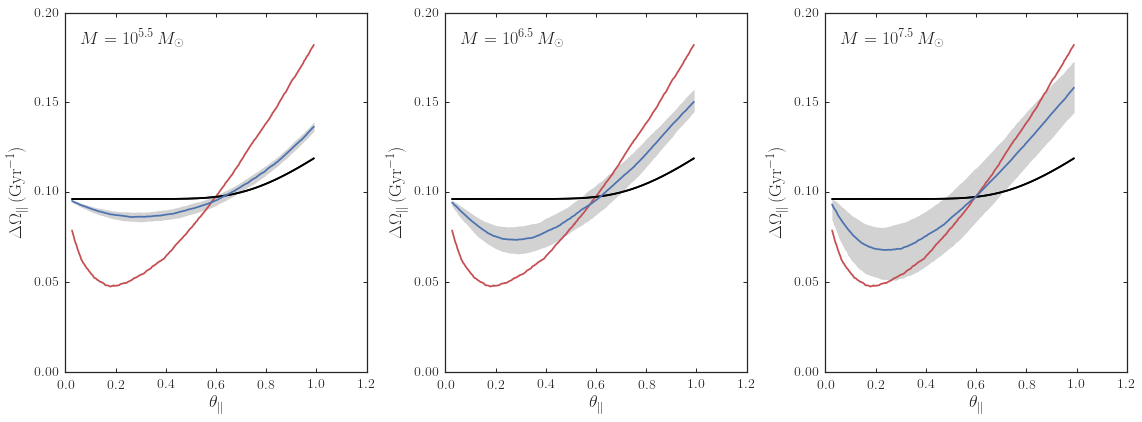

In [5]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(16,6)
subplot(1,3,1)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_5.5_omega.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_omega.dat'),
         color=sns.color_palette()[2],zorder=2)
subplot(1,3,2)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_6.5_omega.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_omega.dat'),
         color=sns.color_palette()[2],zorder=2)
subplot(1,3,3)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_7.5_omega.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_omega.dat'),
         color=sns.color_palette()[2],zorder=2)
set_ranges_and_labels()

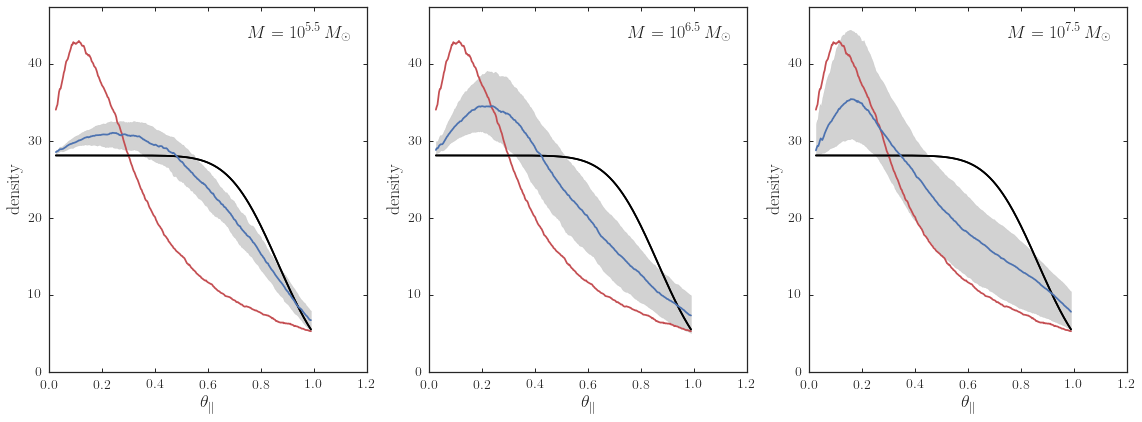

In [6]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(16,6)
subplot(1,3,1)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_5.5_dens.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_dens.dat'),
         color=sns.color_palette()[2],zorder=2)
subplot(1,3,2)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_6.5_dens.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_dens.dat'),
         color=sns.color_palette()[2],zorder=2)
subplot(1,3,3)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_7.5_dens.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_dens.dat'),
         color=sns.color_palette()[2],zorder=2)
set_ranges_and_labels_dens()

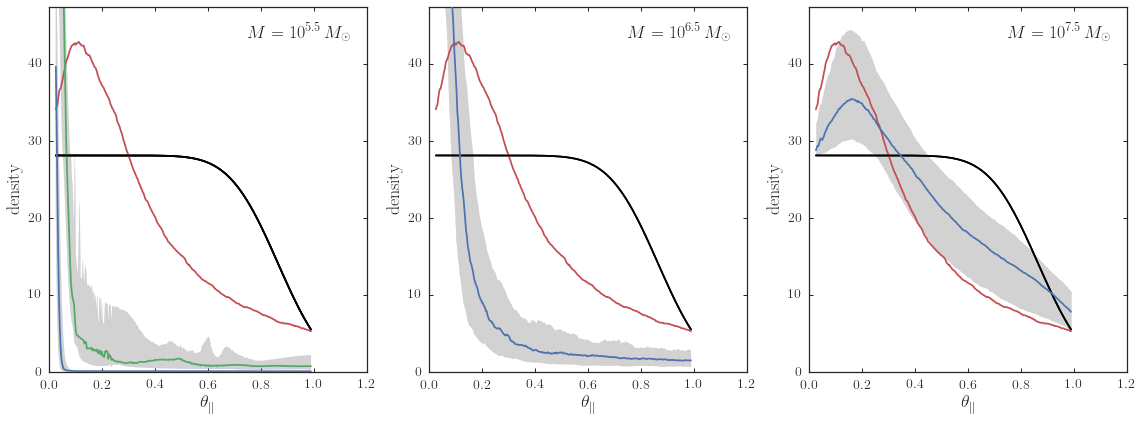

In [26]:
bovy_plot.bovy_print(axes_labelsize=18.,xtick_labelsize=14.,ytick_labelsize=14.)
figsize(16,6)
subplot(1,3,1)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdm10_5-9_dens.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_dens.dat'),
         color=sns.color_palette()[2],zorder=2)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_massexpm1p5_5-9_dens.dat'),
         color=sns.color_palette()[1],zorder=2,fill=True)
subplot(1,3,2)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_cdm3_5-9_dens.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_dens.dat'),
         color=sns.color_palette()[2],zorder=2)
subplot(1,3,3)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X10_7.5_dens.dat'),
         fill=True)
plot_mean(os.path.join(basefilename,'gd1_t64sampling_X5_5-9_dens.dat'),
         color=sns.color_palette()[2],zorder=2)
set_ranges_and_labels_dens()